In [ ]:
## Forage Quantium Data_Analysis Project

In [1]:
#Lets import the necessary packages
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [2]:
# loading the data
df1 = pd.read_excel("C:\\Users\\sam\Downloads\\QVI_transaction_data.xlsx")

In [3]:
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [140]:
# number of records 
df1.PROD_NAME.count()

264836

In [141]:
#info of the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [142]:
 #Columns
df1.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [143]:
# checking the data types
df1.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

## Data Preprocessing

In [144]:
#shape of the data
df1.shape

(264836, 8)

In [145]:
#Checking null values 
df1.isnull().any()

DATE              False
STORE_NBR         False
LYLTY_CARD_NBR    False
TXN_ID            False
PROD_NBR          False
PROD_NAME         False
PROD_QTY          False
TOT_SALES         False
dtype: bool

In [146]:
#Checking na values 
df1.isna().any()

DATE              False
STORE_NBR         False
LYLTY_CARD_NBR    False
TXN_ID            False
PROD_NBR          False
PROD_NAME         False
PROD_QTY          False
TOT_SALES         False
dtype: bool

In [147]:
## changing column names 

In [148]:
df1.rename(columns={'DATE':'Date','STORE_NBR':'Store_id','LYLTY_CARD_NBR':'Loyalty_id','TXN_ID':'Tax_id'
                    ,'PROD_NBR':'Product_id','PROD_NAME'
                    :'Product_name','PROD_QTY':'Quantity','TOT_SALES':'Total_sales'},inplace=True)

In [149]:
df1.head()

,Date,Store_id,Loyalty_id,Tax_id,Product_id,Product_name,Quantity,Total_sales
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [171]:
#changing the date type
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y-%m-%d').dt.date
df1['Date'].head()

0    2018-10-17
1    2019-05-14
2    2019-05-20
3    2018-08-17
4    2018-08-18
Name: Date, dtype: object

In [172]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: Date, dtype: datetime64[ns]

**Keep Only Products with "Chip" or "Chips" expect salsa**

**This ensures that only products with "chip" or "chips" remain in the dataset.**


In [173]:
product_words = df1["Product_name"].str.contains(r"\Salsa\b", case=False, regex=True)
product_words.value_counts()

False    246742
True      18094
Name: Product_name, dtype: int64

**Yes, we need to drop the rows where the value is False because file suggests keeping only chip-related products.**

In [174]:
false_products = product_words[product_words == True].index
# This is will return all index which is false 

df_dropped_products = df1.drop(false_products).reset_index(drop=True)
# This is wll return olny the products only which is True

df_dropped_products.reset_index(drop=True,inplace=True)
#This will reset the index


print("The are ",df_dropped_products.shape[0],"records")


The are  246742 records


In [175]:
#Lets check the unique products
df_dropped_products['Product_name'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'Kettle Original 175g',
       'Red Rock Deli Thai  C

In [176]:
#replacing the unwanted chaacters from the product name
df_dropped_products['Product_name'] =  df_dropped_products['Product_name'].str.replace(r'[\b&\b|\b/\b]'," ",regex=True)

In [177]:
#replacing the incorrect words

# Define a dictionary of replacements
replacements = {
    "Sr": "Sour",
    "Swt": "Sweet",
    "crm": "Cream",
    "Tmato Hrb": "Tomato Herb",
    "saltd": "Salted",
    "Orgn": "Original",
    "Compny":"Company",
    "Originall":"Original",
    "Hny":"Honey"
}

# Apply multiple replacements in one step
df_dropped_products["Product_name"] = df_dropped_products["Product_name"].replace(replacements, regex=True)


In [178]:
#removing extra spaces
df_dropped_products['Product_name'] = df_dropped_products['Product_name'].str.replace(r'(\s+)'," ").str.strip()

#repacing the single characters
df_dropped_products['Product_name'] = df_dropped_products['Product_name'].str.replace(r'([a-z])([A-Z])',r'\1 \2',regex=True)

#repacing the extra digits
df_dropped_products['Product_name'] = df_dropped_products['Product_name'].str.replace(r'([a-z])([\d])',r'\1 \2',regex=True)

df_dropped_products['Product_name'] = df_dropped_products['Product_name'].str.replace(r'(&|S/|/)'," ")

C:\Users\sam\AppData\Local\Temp\ipykernel_7404\166026701.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_dropped_products['Product_name'] = df_dropped_products['Product_name'].str.replace(r'(\s+)'," ").str.strip()
C:\Users\sam\AppData\Local\Temp\ipykernel_7404\166026701.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df_dropped_products['Product_name'] = df_dropped_products['Product_name'].str.replace(r'(&|S/|/)'," ")


In [179]:
#cleaned product data
df_dropped_products['Product_name'].sample(5)

28026     Kettle Sweet Chilli And Sour Cream 175g
116932           Kettle Sea Salt And Vinegar 175g
183576                 RRD Honey Soy Chicken 165g
83559       Kettle Tortilla Chps Feta Garlic 150g
38286     Smiths Crinkle Cut Chips Chs Onion 170g
Name: Product_name, dtype: object

**Lets remove the integer part eg: 175gm and make it as a seperate column for further analysis**

In [180]:
df_dropped_products['Product_name'].head()

0             Natural Chip Company Sea Salt 175g
1                          CCs Nacho Cheese 175g
2          Smiths Crinkle Cut Chips Chicken 170g
3          Smiths Chip Thinly S Cream Onion 175g
4    Kettle Tortilla Chps Honey Jlpno Chili 150g
Name: Product_name, dtype: object

### Extracting the digits from the product_name as Weights


In [181]:
df_dropped_products['Weight'] = df_dropped_products['Product_name'].str.extract(r'(\d+)')

#converting into numeric values
df_dropped_products['Weight'] = pd.to_numeric(df_dropped_products['Weight'])


df_dropped_products['Weight'].sample(5)

194873    200
30545     150
246110    165
129511    270
200500    150
Name: Weight, dtype: int64

In [182]:
#replacing the digits with spaces in the product_name
df_dropped_products['Product_name'] = df_dropped_products['Product_name'].str.replace(r'([\d]+[Gg?])'," ").str.strip()

df_dropped_products[['Product_name']].head()

C:\Users\sam\AppData\Local\Temp\ipykernel_7404\3962065458.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_dropped_products['Product_name'] = df_dropped_products['Product_name'].str.replace(r'([\d]+[Gg?])'," ").str.strip()


,Product_name
0,Natural Chip Company Sea Salt
1,CCs Nacho Cheese
2,Smiths Crinkle Cut Chips Chicken
3,Smiths Chip Thinly S Cream Onion
4,Kettle Tortilla Chps Honey Jlpno Chili


### **No we have cleaned the Product names now lets start detecting the outliers and remove it**

**Identify Transactions with High Quantities > or = 200**

In [183]:
df_dropped_products[df_dropped_products['Quantity']>=200]

,Date,Store_id,Loyalty_id,Tax_id,Product_id,Product_name,Quantity,Total_sales,Weight
64955,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
64956,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


**There are 2  products which contain > or = 200**

In [184]:
#reducing the data less than 200 quantites since the customer is a wholsesale purchaser 
df_dropped_products = df_dropped_products[df_dropped_products['Quantity']<200]

#checking the records anything > than 200
df_dropped_products[df_dropped_products['Quantity']>=200].count().sum()

0

In [185]:
df_dropped_products['Quantity'].max()

#since the max quantity is 5 it is reasonable so we have removed the outliers 

5

**It is free from outliers, Lets check the date**

In [186]:
dates = df_dropped_products['Date']
dates.head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: Date, dtype: datetime64[ns]

In [187]:
pd.date_range(start=dates.min(), end=dates.max()).difference(df_dropped_products['Date'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

**The missing Date is '2018-12-25' which is chrsitmas Let's insert it**

In [188]:
#df_dropped_products['Date'] = pd.to_datetime(df_dropped_products['Date'], format="%d-%m-%Y")

#calculates and finds the missing date 
full_date_range = pd.date_range(start=dates.min(), end=dates.max())

merged_df = pd.merge(pd.Series(full_date_range,name='Date'),df_dropped_products,on='Date',how='left')

#let's check the records
merged_df[merged_df['Date']=='2018-12-25' ]

,Date,Store_id,Loyalty_id,Tax_id,Product_id,Product_name,Quantity,Total_sales,Weight
120465,2018-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**checking the weights to check any outliers................**

In [189]:
print("The min of weight is ",df_dropped_products['Weight'].min(),"The max of weight is",
      df_dropped_products['Weight'].max(),"Seems sensibile")

The min of weight is  70 The max of weight is 380 Seems sensibile


## Time-Series Analysis
### All time sales Trend

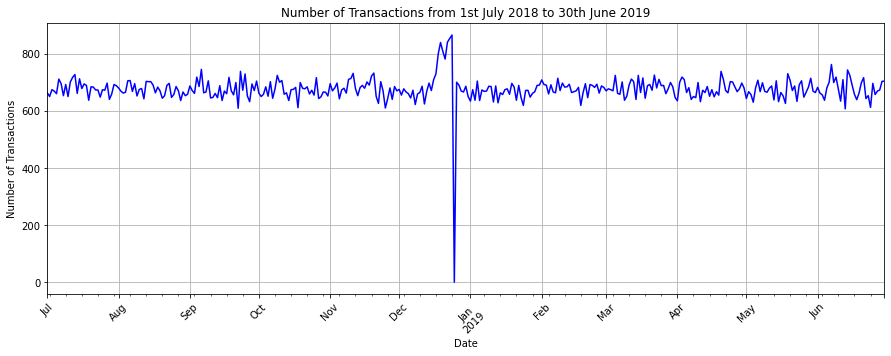

In [190]:

date_range = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')

df_filtered = merged_df[(merged_df['Date'] >= '2018-07-01') & (merged_df['Date'] <= '2019-06-30')]
# Step 3: Group by the date and count the transactions per day
transaction_counts = df_filtered.groupby('Date').size()

# Step 4: Reindex the counts to match the full date range
transaction_counts_full = transaction_counts.reindex(date_range, fill_value=0)

# Step 5: Plot the trend
plt.figure(figsize=(15,5))
transaction_counts_full.plot(kind='line',color='blue')
plt.title('Number of Transactions from 1st July 2018 to 30th June 2019')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## December month sales Trend

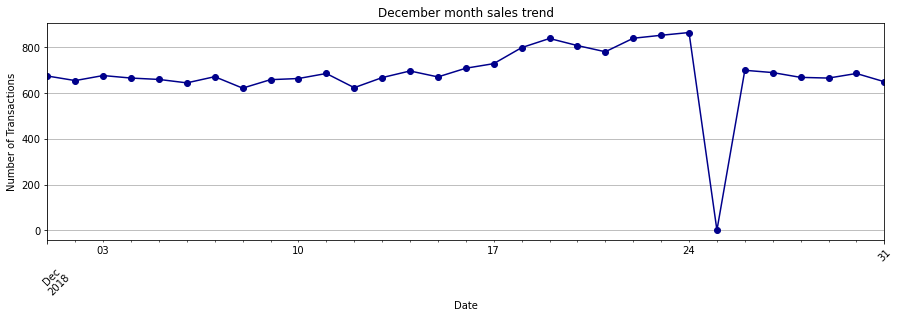

In [191]:
dec_month =  merged_df[(merged_df['Date'] >= '2018-12-01') & (merged_df['Date'] < '2019-01-01')]



plt.figure(figsize=(15,4))
d = dec_month.groupby('Date').size().plot(marker='o',color='darkblue')
plt.title('December month sales trend')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Insights
We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.**

#### Exploring the Weights (grms)

In [192]:
df_dropped_products['Weight'].describe()

count    246740.000000
mean        175.583521
std          59.432118
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: Weight, dtype: float64

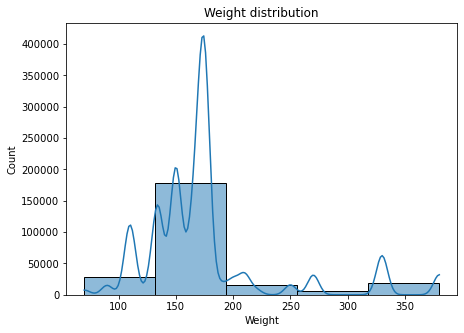

In [193]:
plt.figure(figsize=(7,5))
sns.histplot(df_dropped_products['Weight'],bins=(5),kde=True)
plt.title('Weight distribution')
plt.show()

**Most of the values are concentrated in the lower to mid-range, with a peak around the middle. This suggests that the majority of data points fall within a specific central range, while fewer values extend towards the higher end.**

**Normalize Brand Names**

In [194]:
df_dropped_products['Brand_name']  = df_dropped_products['Product_name'].str.split().str[0]
#  the split method splits the word
#  the str method extracts the first word 

# Dictionary to fix brand inconsistencies
brand_replacements = {
    "WW": "Woolworths",
    "Natural": "Natural Chip Co",
    "Cobs": "Cobs Popd",
    "Smiths": "Smiths",
    "Doritos": "Doritos",
    "Thins": "Thins",
    "French": "French Fries",
    "Dorito": "Doritos",
    "GrnWves": "Grain Waves",
    "Grain": "Grain Waves",
    "Infzns": "Infuzions",
    "NCC": "Natural Chip Co",
    "Red": "RRD",
    "Smith": "Smiths",
    "Snbts": "Sunbites"
}

# Standardize brand names
df_dropped_products["Brand_name"] = df_dropped_products["Brand_name"].replace(brand_replacements)

df_dropped_products.Brand_name.unique()

array(['Natural Chip Co', 'CCs', 'Smiths', 'Kettle', 'Grain Waves',
       'Doritos', 'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'RRD', 'Pringles', 'Grn', 'Tyrrells', 'Cobs Popd',
       'French Fries', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

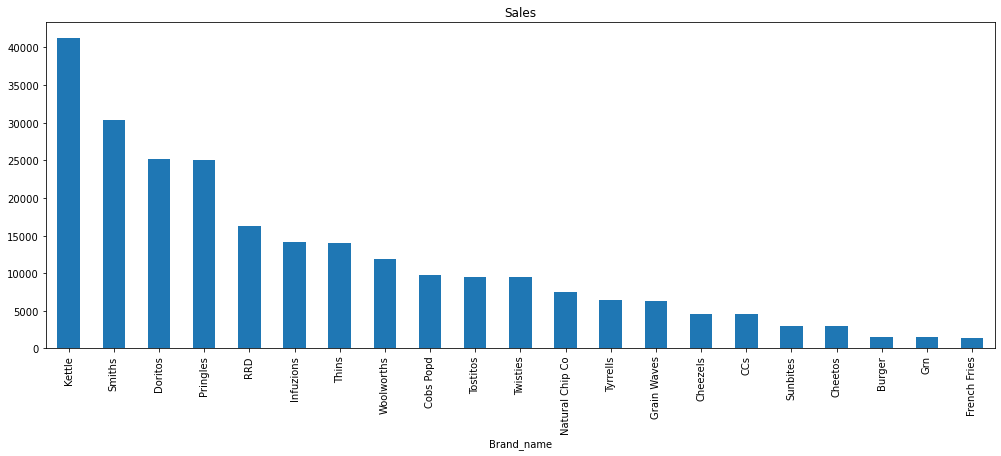

In [195]:
df_dropped_products.groupby('Brand_name').size().sort_values(ascending=False).plot.bar(figsize=(17,6))
plt.title('Sales')
plt.show()

### Highly Skewed Distribution:

- **A few categories have significantly higher values compared to the rest.
    The first few bars dominate, indicating a strong concentration of sales or transactions in a few segments.
    Top Categories Drive Performance:**




- **The first 4-5 categories contribute the most to the overall total.**


In [196]:
transaction_df = df_dropped_products
#changed the variable name 

## Loading customer_data

In [197]:
purchase_df = pd.read_csv("C:\\Users\\sam\\Downloads\\QVI_purchase_behaviour.csv")

In [198]:
#ckecking null values
purchase_df.isna().any()

LYLTY_CARD_NBR      False
LIFESTAGE           False
PREMIUM_CUSTOMER    False
dtype: bool

In [199]:
#ckecking null values
purchase_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [200]:
#Changing the column names
purchase_df = purchase_df.rename(columns={'LYLTY_CARD_NBR':'Loyalty_id','LIFESTAGE'
                            :'Life_stage','PREMIUM_CUSTOMER':'Premier_customer'})
purchase_df.head()

,Loyalty_id,Life_stage,Premier_customer
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [201]:
type(purchase_df.Loyalty_id[0])

numpy.int64

In [202]:
purchase_df.Life_stage.unique() 

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [203]:
# let's seperates "SINGLES/" from the data 


purchase_df['Life_stage'] = purchase_df['Life_stage'].str.title()
# title() converts all upper case to title_case characters


In [204]:
purchase_df.sample(5)

,Loyalty_id,Life_stage,Premier_customer
15190,56044,Young Families,Mainstream
66672,249303,Midage Singles/Couples,Mainstream
52491,197241,Midage Singles/Couples,Mainstream
30562,112146,Older Families,Mainstream
49348,184235,Midage Singles/Couples,Premium


## **Combining the Data**

In [205]:
customer_df = pd.merge(transaction_df,purchase_df,on='Loyalty_id',how='left')
customer_df.head()

,Date,Store_id,Loyalty_id,Tax_id,Product_id,Product_name,Quantity,Total_sales,Weight,Brand_name,Life_stage,Premier_customer
0,2018-10-17,1,1000,1,5,Natural Chip Company Sea Salt,2,6.0,175,Natural Chip Co,Young Singles/Couples,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,Midage Singles/Couples,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,Midage Singles/Couples,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175,Smiths,Midage Singles/Couples,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chps Honey Jlpno Chili,3,13.8,150,Kettle,Midage Singles/Couples,Budget


In [206]:
customer_df.isnull().any().sum()

0

In [207]:
customer_df.isna().any().sum()

0

**So all our customers in the transaction data has been accounted for in the customer dataset.**

**There are no null and empty values**


**So lets start exploring the data. . . . . . . .**

**Data analysis on customer segments**


- **Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is**

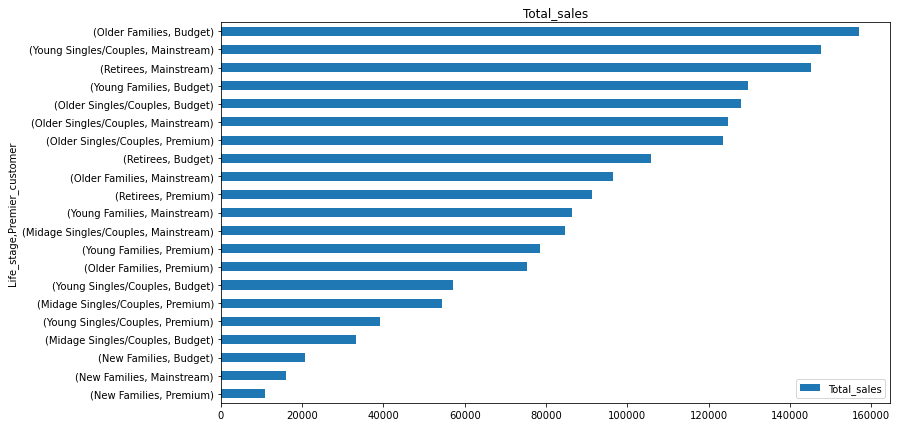

In [208]:
customer_df.groupby(['Life_stage','Premier_customer'])[['Total_sales']].sum().sort_values(
    ascending=True,by='Total_sales').plot.barh(figsize=(12,7))
plt.title('Total_sales')
plt.show()


### Key Insights:  

- 1. Top Spenders: Older Families (Budget) lead with the highest total sales, followed by Young Singles/Couples (Mainstream) and Retirees (Mainstream).
 
 
- 2. Budget & Mainstream Dominate: Most sales come from Budget and Mainstream customers, while Premium customers contribute less.


- 3. Sales Decline: A sharp drop in sales is observed after the top categories, with New Families (Premium) having the lowest sales.

- **How many customers are in each segment**



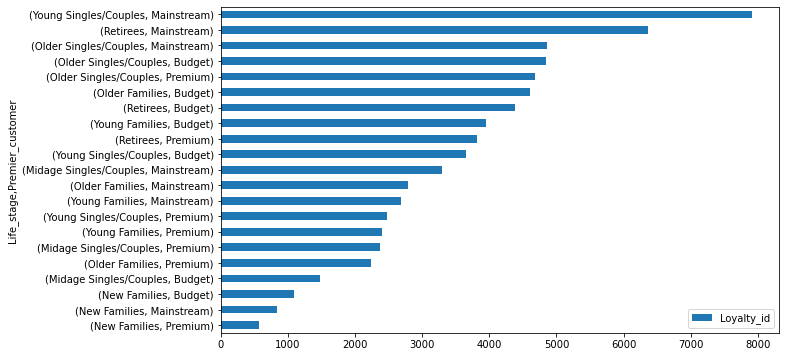

In [209]:
customer_df.groupby(['Life_stage','Premier_customer'])[['Loyalty_id']].nunique().sort_values(
    ascending=True,by='Loyalty_id').plot.barh(figsize=(10,6))
plt.show()

### Key Insights:  
1. **Largest Customer Segments:** Young Singles/Couples (Mainstream) have the highest loyalty count (7,917), followed by Retirees (Mainstream) and Older Singles/Couples (Mainstream).  

2. **Mainstream Dominates:** Most loyal customers belong to the **Mainstream** category, while **Premium has fewer customers**, indicating lower adoption of high-end products.  

3. **Smaller Segments:** New Families and Premium customers have the lowest loyalty counts, suggesting **lower engagement or fewer purchases** in these groups.

- **HOW MANY CHIPS ARE BOUGHT PER CUSTOMER BY SEGMENT**

In [210]:
customer_per_seg = customer_df.groupby(['Loyalty_id','Life_stage','Premier_customer'])[['Date']].count().sort_values(
    ascending=False,by='Date')
customer_per_seg

,,,Date
Loyalty_id,Life_stage,Premier_customer,
230078,Older Families,Budget,17
162039,Older Families,Mainstream,17
179228,Young Families,Budget,16
172032,Young Singles/Couples,Mainstream,16
105026,Young Families,Budget,16
...,...,...,...
142236,Midage Singles/Couples,Budget,1
142233,Young Families,Budget,1
142230,Retirees,Premium,1


customer_per_seg.plot.bar()

**What's the average chip price by customer segment**

In [211]:
customer_df.groupby(['Life_stage','Premier_customer'])[['Total_sales']].mean().sort_values(
    ascending=False,by='Total_sales').round(2)

,,Total_sales
Life_stage,Premier_customer,
Midage Singles/Couples,Mainstream,7.64
Young Singles/Couples,Mainstream,7.55
Retirees,Premium,7.46
Older Singles/Couples,Premium,7.46
Retirees,Budget,7.45
Older Singles/Couples,Budget,7.44
New Families,Mainstream,7.31
Older Singles/Couples,Mainstream,7.31
Young Families,Budget,7.30


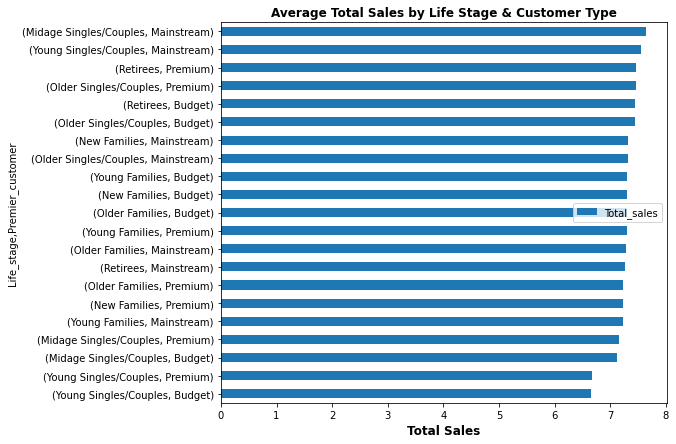

In [212]:
customer_df.groupby(['Life_stage','Premier_customer'])[['Total_sales']].mean().sort_values(
    ascending=True,by='Total_sales').round(2).plot.barh(figsize=(8,7))

plt.title("Average Total Sales by Life Stage & Customer Type",fontweight='bold')
# Bold X and Y Labels
plt.xlabel("Total Sales", fontweight='bold', fontsize=12)

plt.show()

### Key Insights:  
1. **Similar Average Sales:** Total sales across different life stages and customer segments are very close, mostly ranging between **7.1 and 7.6**.  


2. **Top Performers:** Midage Singles/Couples (Mainstream) have the highest total sales per customer (7.64), followed closely by Young Singles/Couples (Mainstream) and Retirees (Premium).  


3. **Premium vs. Budget:** **Premium customers do not significantly outperform Budget/Mainstream customers**, suggesting **pricing strategy and customer preferences drive similar spending patterns** across segments.

- **Average number of units per customer**

In [213]:
avg_chips_per_customer = (customer_df.groupby(['Life_stage',"Premier_customer"])["Quantity"].sum() / customer_df.groupby(
    ['Life_stage','Premier_customer'])["Loyalty_id"].nunique()).sort_values(ascending=False).to_frame()
avg_chips_per_customer

0
Life_stage             Premier_customer          
Older Families         Mainstream        9.255380
                       Budget            9.076773
                       Premium           9.071717
Young Families         Budget            8.722995
                       Premium           8.716013
                       Mainstream        8.638361
Older Singles/Couples  Budget            6.781398
                       Premium           6.769543
                       Mainstream        6.712021
Midage Singles/Couples Mainstream        6.432080
Retirees               Budget            6.141847
                       Premium           6.103358
Midage Singles/Couples Premium           6.078514
                       Budget            6.026459
Retirees               Mainstream        5.925920
New Families           Mainstream        4.891566
                       Budget            4.821527
                       Premium           4.815652
Young Singles/Couples  Mainstream        4.575597
                       Premium           4.264113
                       Budget            4.250069

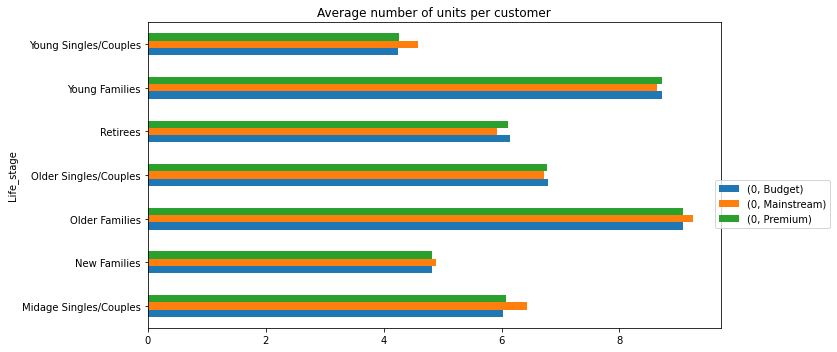

In [214]:
avg_chips_per_customer.unstack().plot.barh(figsize=(12,5))
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 0.5))
plt.title("Average number of units per customer")
plt.tight_layout()

### Key Insights:  
1. **Older Families Spend the Most:** Older Families across **all customer segments (Mainstream, Budget, Premium)** have the highest values, indicating they are the most valuable group.  


2. **Young Families Rank Second:** Their spending is slightly lower than Older Families but still higher than other life stages.  


3. **Young Singles/Couples Spend the Least:** Their values are the lowest, suggesting **lower purchasing power or engagement compared to older demographics**.

- **AVERAGE CHIPS PRICE PER TRANSACTION BY SEGMENTS**

In [215]:
grouped = customer_df.groupby(['Life_stage','Premier_customer'])[['Total_sales','Quantity']].sum()
grouped["avg_unit_per_price"] = grouped['Total_sales'] / grouped['Quantity']
grouped_avg_price = grouped["avg_unit_per_price"].sort_values(ascending=False).round(2).to_frame()
grouped_avg_price

avg_unit_per_price
Life_stage             Premier_customer                    
Young Singles/Couples  Mainstream                      4.07
Midage Singles/Couples Mainstream                      3.99
New Families           Mainstream                      3.94
Retirees               Budget                          3.93
New Families           Budget                          3.93
Retirees               Premium                         3.92
Older Singles/Couples  Premium                         3.90
                       Budget                          3.89
New Families           Premium                         3.89
Retirees               Mainstream                      3.85
Older Singles/Couples  Mainstream                      3.82
Midage Singles/Couples Premium                         3.78
Young Families         Budget                          3.76
                       Premium                         3.76
Midage Singles/Couples Budget                          3.75
Older Families         Budget                          3.75
                       Mainstream                      3.74
Young Families         Mainstream                      3.72
Older Families         Premium                         3.72
Young Singles/Couples  Premium                         3.69
                       Budget                          3.69

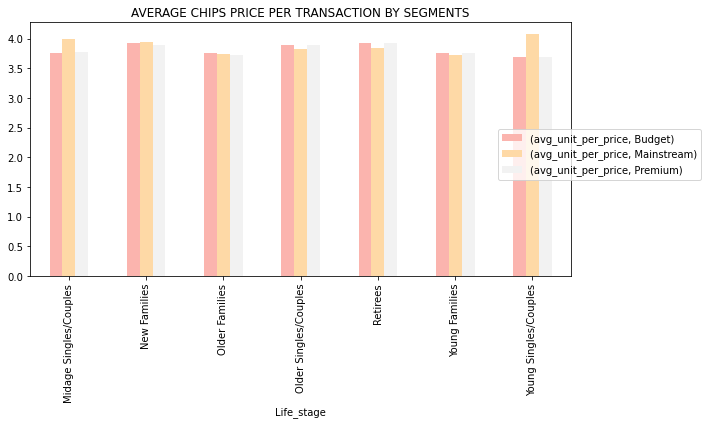

In [216]:
grouped_avg_price.unstack().plot.bar(figsize=(10,6),colormap='Pastel1')

plt.legend(loc='upper right',bbox_to_anchor=(1.25, 0.6))
plt.title("AVERAGE CHIPS PRICE PER TRANSACTION BY SEGMENTS")
plt.tight_layout()

### Key Insights:  
1. **Young Singles/Couples (Mainstream) Pay the Most:** They have the highest average unit price (4.07), indicating a **preference for higher-priced products**.  


2. **New Families and Midage Singles/Couples Also Spend More:** Their unit prices remain close to 4.00, suggesting **a willingness to spend on quality or premium items**.  


3. **Older Families and Young Families Pay Less:** Their average unit price is lower (~3.69–3.75), implying **a preference for budget-friendly or bulk purchases**.

## T-Test stastics

In [217]:
#"Mainstream" vs. "Budget/Premium"

In [218]:
# Filter using query() for Young Singles/Couples and Midage Singles/Couples
a = customer_df.query('Life_stage in  ["Young Singles/Couples","Midage Singles/Couples"]')

# Separating the data for Mainstream customers
mainstream = a.query('Premier_customer == "Mainstream"')['Total_sales']

# Separating the data for budget_premium customers
budget_premium = a.query('Premier_customer in ["Budget", "Premium"]')["Total_sales"]



In [219]:
from scipy.stats import ttest_ind

## Perform the independent t-test
stat, pval = ttest_ind(mainstream, budget_premium, equal_var=False)

print(f"t-statistic: {stat.round(2)}")
print(f"p-value: {pval}")

# Interpret the results
if pval < 0.05:
    print("There is a significant difference between Mainstream and Budget/Premium groups.")
else:
    print("There is no significant difference between Mainstream and Budget/Premium groups.")

t-statistic: 33.07
p-value: 1.834645908180742e-237
There is a significant difference between Mainstream and Budget/Premium groups.


### Identifying Brand Preferences Among Mainstream Young Singles/Couples for Targeted Marketing

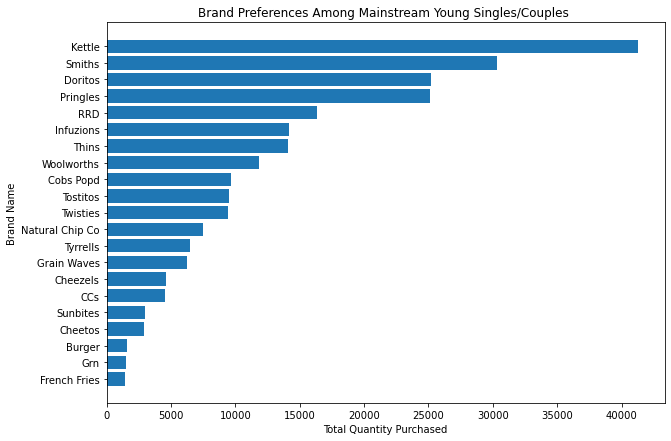

In [220]:
customer_df[(customer_df['Life_stage'] == 'Young Singles/Couples') & (customer_df['Premier_customer'] == 'Mainstream')]
brand_counts = customer_df.groupby('Brand_name').size().sort_values(ascending=True)

plt.figure(figsize=(10,7))
plt.barh(brand_counts.index,brand_counts.values)
plt.xlabel("Total Quantity Purchased")
plt.ylabel("Brand Name")
plt.title("Brand Preferences Among Mainstream Young Singles/Couples ")
plt.show()

## Key insight

**Kettle is the most preferred brand, followed by Smiths, Doritos, and Pringles, indicating strong consumer loyalty toward these brands. Mid-tier brands like RRD, Infuzions, and Thins also have a notable presence, while lower-ranked brands show niche or limited appeal. This suggests a concentrated market with a few dominant players driving most sales.**

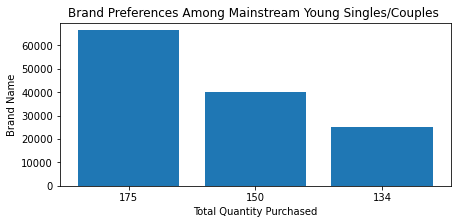

In [221]:
customer_df[(customer_df['Life_stage'] == 'Young Singles/Couples') & (customer_df['Premier_customer'] == 'Mainstream')]
Weight_count = customer_df.groupby('Weight').size().sort_values(ascending=False).head(3)

wrd_txt = [str(Weight) for Weight in Weight_count.index]

plt.figure(figsize=(7,3))
plt.bar(wrd_txt,Weight_count)
plt.xlabel("Total Quantity Purchased")
plt.ylabel("Brand Name")
plt.title("Brand Preferences Among Mainstream Young Singles/Couples ")
plt.show()

### Key insights

- **175g packs** are the most frequently purchased, indicating a strong customer preference for larger pack sizes.  
- **150g packs** follow, showing a notable demand but lower than the top-selling size.  

**This pattern suggests that customers may prioritize value-for-money or bulk purchases, influencing product stocking and promotional strategies.**

# Apirori algorthim

### Brand

In [222]:
customer_df.Premier_customer.unique()

array(['Premium', 'Budget', 'Mainstream'], dtype=object)

In [223]:
#filtering out the Mainstream Young single couples data

ycm_df =  customer_df[(customer_df['Life_stage'] == 'Young Singles/Couples') & (
    customer_df['Premier_customer'] == 'Mainstream')]

ycm_df.head()

,Date,Store_id,Loyalty_id,Tax_id,Product_id,Product_name,Quantity,Total_sales,Weight,Brand_name,Life_stage,Premier_customer
221345,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag Sauce,1,2.6,150,Smiths,Young Singles/Couples,Mainstream
221346,2018-08-17,1,1163,188,46,Kettle Original,1,5.4,175,Kettle,Young Singles/Couples,Mainstream
221347,2018-08-14,1,1291,333,27,WW Supreme Cheese Corn Chips,1,1.9,200,Woolworths,Young Singles/Couples,Mainstream
221348,2019-05-15,3,3031,1227,14,Smiths Crnkle Chip Originall Big Bag,1,5.9,380,Smiths,Young Singles/Couples,Mainstream
221349,2019-05-18,3,3118,1574,62,Pringles Mystery Flavour,1,3.7,134,Pringles,Young Singles/Couples,Mainstream


In [224]:
#installing the necessary libraries
from mlxtend.frequent_patterns import apriori , association_rules
from mlxtend.preprocessing import TransactionEncoder

#grouping the data 
# converting into list
df = ycm_df.groupby('Loyalty_id')['Brand_name'].apply(list).tolist()
df[:5]

[['RRD'],
 ['Doritos'],
 ['Kettle', 'RRD', 'Infuzions'],
 ['Smiths', 'Smiths', 'Grn'],
 ['Tyrrells', 'Twisties', 'Doritos']]

In [225]:
te = TransactionEncoder()

#Fitting and transforming the data 
te_ary = te.fit(df).transform(df)

#Converting into Data frame 
encode_df = pd.DataFrame(te_ary,columns=te.columns_)

#sample data
encode_df.sample(10)

,Burger,CCs,Cheetos,Cheezels,Cobs Popd,Doritos,French Fries,Grain Waves,Grn,Infuzions,...,Natural Chip Co,Pringles,RRD,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
3853,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
7187,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1775,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2737,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
659,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
4945,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6690,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
511,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5367,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4292,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


### Frequent Pattern

In [226]:
frequent_items = apriori(encode_df,min_support=0.03,use_colnames=True) #lets put the support 30%

#Top 5 frequent itemssets
frequent_items.sort_values(ascending=False,by='support').head()

,support,itemsets
5,0.387142,(Kettle)
2,0.260326,(Doritos)
7,0.256158,(Pringles)
9,0.202476,(Smiths)
4,0.143110,(Infuzions)


In [227]:
rules = association_rules(frequent_items,metric='confidence',min_threshold=0.3)  #30% 
rules.sort_values(ascending=False,by='confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
6,(Thins),(Kettle),0.136036,0.387142,0.051282,0.376973,0.973734,1.0,-0.001383,0.983679,-0.030276,0.108672,-0.016592,0.254718
5,(Smiths),(Kettle),0.202476,0.387142,0.075660,0.373674,0.965214,1.0,-0.002727,0.978498,-0.043236,0.147211,-0.021974,0.284553
4,(RRD),(Kettle),0.093975,0.387142,0.034104,0.362903,0.937391,1.0,-0.002278,0.961955,-0.068657,0.076293,-0.039550,0.225497
0,(Cobs Popd),(Kettle),0.103827,0.387142,0.037262,0.358881,0.927001,1.0,-0.002934,0.955920,-0.080773,0.082127,-0.046113,0.227564
3,(Pringles),(Kettle),0.256158,0.387142,0.091449,0.357002,0.922148,1.0,-0.007720,0.953126,-0.101929,0.165713,-0.049179,0.296609
7,(Tostitos),(Kettle),0.105848,0.387142,0.037641,0.355609,0.918549,1.0,-0.003338,0.951065,-0.090223,0.082663,-0.051452,0.226418
9,(RRD),(Smiths),0.093975,0.202476,0.033346,0.354839,1.752500,1.0,0.014318,1.236163,0.473924,0.126740,0.191045,0.259765
2,(Infuzions),(Kettle),0.143110,0.387142,0.049766,0.347749,0.898248,1.0,-0.005637,0.939606,-0.116761,0.103575,-0.064276,0.238149
1,(Doritos),(Kettle),0.260326,0.387142,0.089933,0.345463,0.892344,1.0,-0.010850,0.936324,-0.140232,0.161305,-0.068006,0.288882
8,(Twisties),(Kettle),0.107364,0.387142,0.036251,0.337647,0.872154,1.0,-0.005314,0.925275,-0.141054,0.079107,-0.080760,0.215642


### **Key Insights (Confidence ≥ 30%)**  

1. **Kettle is the Most Associated Brand**  
   - Many chips brands (**Thins, Smiths, RRD, Pringles, Doritos**) frequently lead to **Kettle purchases** (**37.7% confidence for Thins → Kettle**).  

2. **Strong RRD-Smiths Connection**  
   - **RRD → Smiths (35.4% confidence, 1.75 lift)** suggests **RRD buyers are highly likely to buy Smiths**, making it ideal for **bundled promotions**.  

3. **Marketing Strategy**  
   - Promote **Kettle with Thins, Smiths, or Pringles** for better cross-sales.  
   - **Pair RRD & Smiths** in offers to boost sales. 🚀selling strategies!

- **Weights**

In [228]:
#filtering out the Mainstream Young single couples data

#grouping the data 
# converting into list
weight_df = ycm_df.groupby('Loyalty_id')['Weight'].apply(list).tolist()
weight_df[:5]


[[150], [170], [150, 165, 70], [150, 330, 180], [165, 270, 170]]

In [229]:
te = TransactionEncoder()

#Fitting and transforming the data 
we_ary = te.fit(weight_df).transform(weight_df)

#Converting into Data frame 
weight_encode_df = pd.DataFrame(we_ary,columns=te.columns_)

#sample data
weight_encode_df.sample(10)

,70,90,110,125,134,135,150,160,165,170,175,180,190,200,210,220,250,270,330,380
4912,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
7787,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1064,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
7375,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5633,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
6222,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
606,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5805,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
1257,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4517,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [230]:
w_frequent_items = apriori(weight_encode_df,min_support=0.03,use_colnames=True) #lets put the support 30%

#Top 5 frequent itemssets
w_frequent_items.sort_values(ascending=False,by='support').head()

,support,itemsets
6,0.458254,(175)
3,0.313755,(150)
1,0.256158,(134)
0,0.224454,(110)
5,0.176835,(170)


In [231]:
w_rules = association_rules(w_frequent_items,metric='confidence',min_threshold=0.3)  #30% 
w_rules.sort_values(ascending=False,by='confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
16,"(170, 150)",(175),0.054692,0.458254,0.030693,0.561201,1.224649,1.0,0.005630,1.234610,0.194053,0.063646,0.190027,0.314090
14,"(134, 150)",(175),0.075028,0.458254,0.040293,0.537037,1.171919,1.0,0.005911,1.170171,0.158598,0.081732,0.145424,0.312482
12,"(110, 150)",(175),0.065303,0.458254,0.033346,0.510638,1.114312,1.0,0.003421,1.107045,0.109752,0.068024,0.096695,0.291703
7,(165),(175),0.127700,0.458254,0.060124,0.470821,1.027423,1.0,0.001605,1.023747,0.030598,0.114341,0.023196,0.301011
8,(170),(175),0.176835,0.458254,0.080586,0.455714,0.994457,1.0,-0.000449,0.995333,-0.006726,0.145330,-0.004689,0.315784
11,(380),(175),0.076418,0.458254,0.033725,0.441322,0.963051,1.0,-0.001294,0.969693,-0.039884,0.067322,-0.031255,0.257458
4,(150),(175),0.313755,0.458254,0.137931,0.439614,0.959322,1.0,-0.005849,0.966736,-0.058194,0.217530,-0.034409,0.370303
1,(134),(175),0.256158,0.458254,0.111153,0.433925,0.946909,1.0,-0.006232,0.957021,-0.070093,0.184255,-0.044909,0.338241
10,(330),(175),0.139320,0.458254,0.059113,0.424297,0.925899,1.0,-0.004731,0.941016,-0.085075,0.109782,-0.062681,0.276647
9,(270),(175),0.074902,0.458254,0.031578,0.421585,0.919981,1.0,-0.002747,0.936604,-0.085941,0.062956,-0.067687,0.245247


### **Key Insights (Confidence ≥ 30%)**  

1. **Strong Association with Item 175**  
   - **(170, 150) → 175 (56.1% confidence, 1.22 lift)** suggests **buying 170 & 150 together increases the likelihood of purchasing 175**.  
   - **Single items 150, 134, 110, and 165 also strongly associate with 175 (≥ 42% confidence).**  

2. **Item 150 & 175 Have Mutual Influence**  
   - **175 → 150 (30% confidence, 0.96 lift)** and **150 → 175 (43.9% confidence, 0.96 lift)** show **strong bidirectional association**.  
   - **Promote 150 & 175 together** to maximize cross-sales.  

3. **Marketing Strategy**  
   - Bundle **170, 150 & 175** for targeted promotions.  
   - Recommend **150 when selling 175, and vice versa** to enhance sales.

In [ ]:
#Loading the data csv for further analysis
customer_df.to_excel("customer_transcation_df.xlsx",index=False)